# **Model 1: Linear (Ridge) Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

def load_data():
    data = pd.read_csv("https://raw.githubusercontent.com/dustinlaa/cs375lego/main/SKADS_lego_clean.csv")

    data = data.drop(['toy_name', 'discount', 'age', 'price'], axis=1)
    data[['llavero', 'original', 'adult']] = data[['llavero', 'original', 'adult']].astype(int)
    cols = data.columns.tolist()

    #Label encoder
    oe = OrdinalEncoder()
    data['colection'] = oe.fit_transform(data[['colection']])

    #Scale data
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)

    data = pd.DataFrame(data, columns=cols)
    X = data.drop(['calification'], axis=1)
    y = data['calification']

    return X,y

X, y = load_data()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature engineering
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X_train)

# Regularization (Ridge Regression)
# Apply Ridge Regression or Lasso Regression to penalize large coefficients and prevent overfitting.
ridge = Ridge(alpha=0.0000000001)
ridge.fit(X_poly, y_train)

# Transform test data using the same polynomial features
X_test_poly = poly.transform(X_test)

# Predict on the test data
y_pred_test = ridge.predict(X_test_poly)

# Calculate evaluation metrics for the test data
model1_mse = mean_squared_error(y_test, y_pred_test)
model1_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
model1_mae = mean_absolute_error(y_test, y_pred_test)
model1_r2 = r2_score(y_test, y_pred_test)

print("Testing Data:")
print(f"Mean Squared Error: {model1_mse:.4f}")
print(f"Root Mean Squared Error: {model1_rmse:.4f}")
print(f"Mean Absolute Error: {model1_mae:.4f}")
print(f"R-squared: {model1_r2:.4f}")



Testing Data:
Mean Squared Error: 0.0215
Root Mean Squared Error: 0.1466
Mean Absolute Error: 0.0916
R-squared: 0.1135


# **Model 2: Graph Neural Network (GNN)**

In [ ]:
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 16.5 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 19.2 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 30.7 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-lo0cq96t
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-lo0cq96t
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit ed170342eb2b174fd16b910c735758edbd4e78fd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.6.0-py3-none-any.whl size=11

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch.utils.data import DataLoader

# To load the data and scale categorical values
def load_data():
    data = pd.read_csv("https://raw.githubusercontent.com/dustinlaa/cs375lego/main/SKADS_lego_clean.csv")

    data = data.drop(['toy_name', 'discount', 'age', 'price'], axis=1)
    data[['llavero', 'original', 'adult']] = data[['llavero', 'original', 'adult']].astype(int)
    cols = data.columns.tolist()

    #Label encoder
    oe = OrdinalEncoder()
    data['colection'] = oe.fit_transform(data[['colection']])

    #Scale data
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)

    data = pd.DataFrame(data, columns=cols)
    X = data.drop(['calification'], axis=1)
    y = data['calification']

    return X,y

X, y = load_data()

############# Hyperparameter Tuning #############
hidden_dim = 72
lr = 0.009
batch_size = 48
num_of_epochs = 1000
dropout = 0.25 # to prevent overfitting
patience = 60
tolerance = 0.001
#################################################

print("\nHyperparameters:")
print(f"hidden_dim: {hidden_dim}")
print(f"lr: {lr}")
print(f"batch_size: {batch_size}")
print(f"num_of_epochs: {num_of_epochs}")
print(f"dropout: {dropout}")
print(f"patience: {patience}")
print(f"patience: {tolerance}\n")


np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct edge index for training data
edge_index_train = kneighbors_graph(X_train, n_neighbors=5, mode='connectivity').toarray() # Creates a kneighbors graph
edge_index_train = torch.from_numpy(edge_index_train).nonzero().t().contiguous() # Converts to pytorch tensor
x_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float)

train_data = Data(x=x_train_tensor, edge_index=edge_index_train, y=y_train_tensor) # Creates Data object of a single graph for training

# Construct edge index for test data
edge_index_test = kneighbors_graph(X_test, n_neighbors=5, mode='connectivity').toarray() # Creates a kneighbors graph
edge_index_test = torch.from_numpy(edge_index_test).nonzero().t().contiguous() # Converts to pytorch tensor
x_test_tensor = torch.tensor(X_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

test_data = Data(x=x_test_tensor, edge_index=edge_index_test, y=y_test_tensor) # Creates Data object of a single graph for testing

torch.manual_seed(42)

# The Graph Convolutional Network (A type of GNN Model)
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout=dropout):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv3(x, edge_index)
        return x

# Creating the model
model = GCN(input_dim=X.shape[1], hidden_dim=hidden_dim, output_dim=1, dropout=dropout)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Training the model - trains the model and calculates how much loss per epoch
def train_model(model, criterion, optimizer, train_loader, num_epochs, patience, tolerance):
    model.train()
    best_loss = float('inf')
    count = 0
    for epoch in range(num_epochs):
        total_loss = 0.0
        for data in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, data.y.view(-1, 1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        epoch_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

        # Check for early stopping
        if epoch_loss < best_loss - tolerance:
            best_loss = epoch_loss
            count = 0
        else:
            count += 1
            if count >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

def custom_collate(batch):
    return batch[0]


train_loader = DataLoader([train_data], batch_size=batch_size, shuffle=True, collate_fn=custom_collate) # Creates batches of data for training
train_model(model, criterion, optimizer, train_loader, num_epochs=num_of_epochs, patience=patience, tolerance=tolerance)

# Evaluating the model - gets the total average loss
def evaluate_model(model, criterion, test_loader):
    model.eval()
    total_loss = 0.0
    num_batches = 0
    mse = 0.0
    with torch.no_grad():
        for data in test_loader:
            outputs = model(data)
            loss = criterion(outputs, data.y.view(-1, 1))
            total_loss += loss.item()
            num_batches += 1

test_loader = DataLoader([test_data], batch_size=batch_size, shuffle=False, collate_fn=custom_collate) # Creates batches of data for testing
evaluate_model(model, criterion, test_loader)

def evaluate_model(model, criterion, test_loader):
    model.eval()
    total_loss = 0.0
    num_batches = 0
    predictions = []
    true_labels = []
    with torch.no_grad():
        for data in test_loader:
            outputs = model(data)
            loss = criterion(outputs, data.y.view(-1, 1))
            total_loss += loss.item()
            num_batches += 1
            predictions.extend(outputs.squeeze().detach().numpy())
            true_labels.extend(data.y.numpy())

    avg_loss = total_loss / num_batches
    # print(f"\nAverage Test Loss: {avg_loss:.4f}")

    # Convert predictions and true labels to numpy arrays
    predictions = np.array(predictions)
    true_labels = np.array(true_labels)

    # Calculate evaluation metrics
    model2_mse = mean_squared_error(true_labels, predictions)
    model2_rmse = mean_squared_error(true_labels, predictions, squared=False)
    model2_mae = mean_absolute_error(true_labels, predictions)
    model2_r2 = r2_score(true_labels, predictions)

    print("Testing Data:")
    print(f"Mean Squared Error: {model2_mse:.4f}")
    print(f"RMSE: {model2_rmse:.4f}")
    print(f"MAE: {model2_mae:.4f}")
    print(f"R2 Score: {model2_r2:.4f}")

evaluate_model(model, criterion, test_loader)



Hyperparameters:
hidden_dim: 72
lr: 0.009
batch_size: 48
num_of_epochs: 1000
dropout: 0.25
patience: 60
patience: 0.001

Epoch 1/1000, Loss: 0.7546
Epoch 2/1000, Loss: 0.2475
Epoch 3/1000, Loss: 0.2019
Epoch 4/1000, Loss: 0.2726
Epoch 5/1000, Loss: 0.2054
Epoch 6/1000, Loss: 0.1138
Epoch 7/1000, Loss: 0.0849
Epoch 8/1000, Loss: 0.0803
Epoch 9/1000, Loss: 0.0974
Epoch 10/1000, Loss: 0.1042
Epoch 11/1000, Loss: 0.0977
Epoch 12/1000, Loss: 0.0908
Epoch 13/1000, Loss: 0.0840
Epoch 14/1000, Loss: 0.0738
Epoch 15/1000, Loss: 0.0679
Epoch 16/1000, Loss: 0.0589
Epoch 17/1000, Loss: 0.0521
Epoch 18/1000, Loss: 0.0476
Epoch 19/1000, Loss: 0.0473
Epoch 20/1000, Loss: 0.0495
Epoch 21/1000, Loss: 0.0522
Epoch 22/1000, Loss: 0.0474
Epoch 23/1000, Loss: 0.0443
Epoch 24/1000, Loss: 0.0487
Epoch 25/1000, Loss: 0.0411
Epoch 26/1000, Loss: 0.0409
Epoch 27/1000, Loss: 0.0424
Epoch 28/1000, Loss: 0.0411
Epoch 29/1000, Loss: 0.0407
Epoch 30/1000, Loss: 0.0431
Epoch 31/1000, Loss: 0.0399
Epoch 32/1000, Loss

# **Model 3: Random Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler

def load_data():
    data = pd.read_csv("https://raw.githubusercontent.com/dustinlaa/cs375lego/main/SKADS_lego_clean.csv")

    data = data.drop(['toy_name', 'discount', 'age', 'price'], axis=1)
    data[['llavero', 'original', 'adult']] = data[['llavero', 'original', 'adult']].astype(int)
    cols = data.columns.tolist()

    #Label encoder
    oe = OrdinalEncoder()
    data['colection'] = oe.fit_transform(data[['colection']])

    #Scale data
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)

    data = pd.DataFrame(data, columns=cols)
    X = data.drop(['calification'], axis=1)
    y = data['calification']

    return X,y

X, y = load_data()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)

kfold = KFold(n_splits=77, random_state=42, shuffle=True)

for i, (train_ix, test_ix) in enumerate(kfold.split(X,y)):
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    print(f"{i}: Loss: {loss:.4f}")

y_pred = model.predict(X_test)

model3_mse = mean_squared_error(y_test, y_pred)
model3_rmse = mean_squared_error(y_test, y_pred, squared=False)
model3_mae = mean_absolute_error(y_test, y_pred)
model3_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {model3_mse:.4f}")
print(f"RMSE: {model3_rmse:.4f}")
print(f"MAE: {model3_mae:.4f}")
print(f"R2 Score: {model3_r2:.4f}")


0: Loss: 0.0371
1: Loss: 0.0103
2: Loss: 0.0142
3: Loss: 0.0135
4: Loss: 0.0108
5: Loss: 0.0171
6: Loss: 0.0074
7: Loss: 0.0176
8: Loss: 0.0595
9: Loss: 0.0069
10: Loss: 0.0064
11: Loss: 0.0133
12: Loss: 0.0167
13: Loss: 0.0460
14: Loss: 0.0378
15: Loss: 0.0469
16: Loss: 0.0082
17: Loss: 0.0122
18: Loss: 0.0671
19: Loss: 0.0062
20: Loss: 0.0359
21: Loss: 0.0071
22: Loss: 0.0115
23: Loss: 0.0215
24: Loss: 0.0092
25: Loss: 0.0110
26: Loss: 0.0124
27: Loss: 0.0069
28: Loss: 0.0105
29: Loss: 0.0161
30: Loss: 0.0084
31: Loss: 0.0061
32: Loss: 0.0121
33: Loss: 0.0188
34: Loss: 0.0185
35: Loss: 0.0425
36: Loss: 0.0044
37: Loss: 0.0425
38: Loss: 0.0239
39: Loss: 0.0159
40: Loss: 0.0182
41: Loss: 0.0123
42: Loss: 0.0166
43: Loss: 0.0140
44: Loss: 0.0367
45: Loss: 0.0088
46: Loss: 0.0254
47: Loss: 0.0309
48: Loss: 0.0237
49: Loss: 0.0078
50: Loss: 0.0156
51: Loss: 0.0171
52: Loss: 0.0116
53: Loss: 0.0107
54: Loss: 0.0055
55: Loss: 0.0093
56: Loss: 0.0070
57: Loss: 0.0067
58: Loss: 0.0186
59: Los

# **Model Visualization**

<ipython-input-31-518b2b3a21fb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mse_values, palette='viridis')


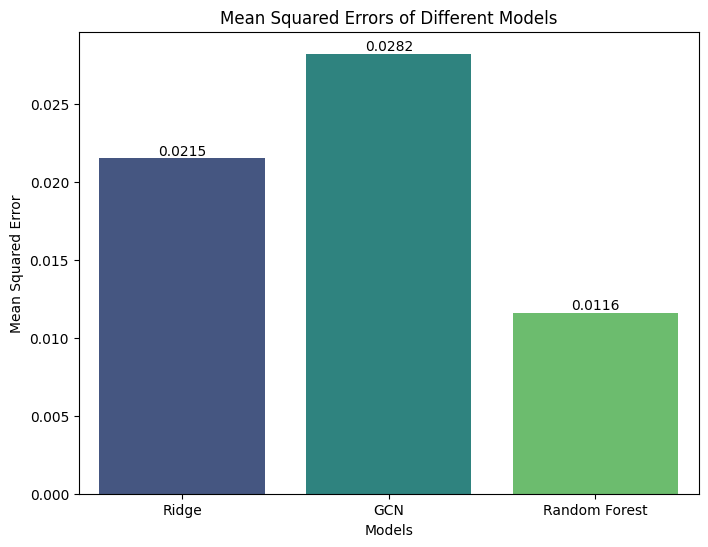

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of MSE values
mse_values = [0.0215, 0.0282, 0.0116]
model_names = ['Ridge', 'GCN', 'Random Forest']

# Create bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=mse_values, palette='viridis')

# Add text labels on top of bars
for i in range(len(model_names)):
    plt.text(i, mse_values[i], f'{mse_values[i]:.4f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Errors of Different Models')
plt.show()


<ipython-input-30-9c999838ef26>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=rmse_values, palette='viridis')


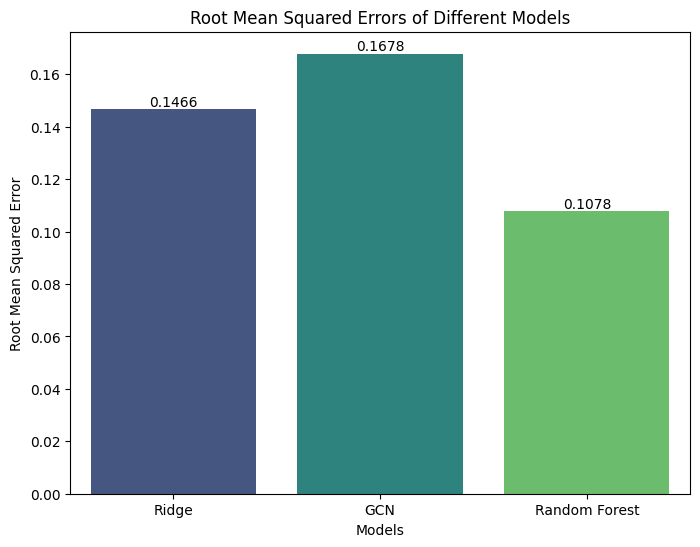

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of RMSE values
rmse_values = [0.1466, 0.1678, 0.1078]
model_names = ['Ridge', 'GCN', 'Random Forest']

# Create bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=rmse_values, palette='viridis')

# Add text labels on top of bars
for i in range(len(model_names)):
    plt.text(i, rmse_values[i], f'{rmse_values[i]:.4f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Errors of Different Models')
plt.show()


<ipython-input-29-1da8000f1ff5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mae_values, palette='viridis')


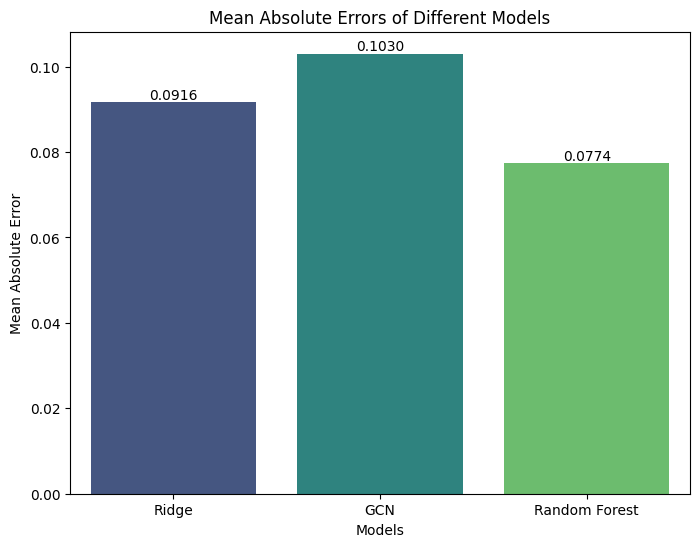

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of MAE values
mae_values = [0.0916, 0.1030, 0.0774]
model_names = ['Ridge', 'GCN', 'Random Forest']

# Create bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=mae_values, palette='viridis')

# Add text labels on top of bars
for i in range(len(model_names)):
    plt.text(i, mae_values[i], f'{mae_values[i]:.4f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Errors of Different Models')
plt.show()


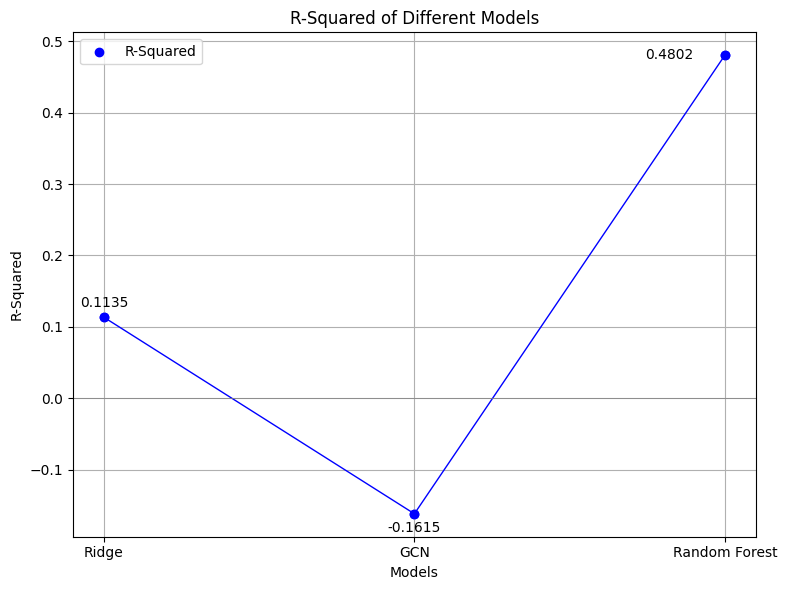

In [ ]:
import matplotlib.pyplot as plt

# List of R-Squared values
r2_values = [0.1135, -0.1615, 0.4802]
model_names = ['Ridge', 'GCN', 'Random Forest']

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(model_names, r2_values, color='blue', label='R-Squared')
plt.plot(model_names, r2_values, color='blue', linestyle='-', marker='o', linewidth=1)  # Add line

# Add text labels with custom positions
for i in range(len(model_names)):
    if i == 1:  # For Model 2
        plt.text(model_names[i], r2_values[i] - 0.01, f'{r2_values[i]:.4f}', ha='center', va='top')
    elif i == 2:  # For Model 3
        plt.text(i - 0.1, r2_values[i], f'{r2_values[i]:.4f}', ha='right', va='center')
    else:
        plt.text(model_names[i], r2_values[i] + 0.01, f'{r2_values[i]:.4f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('R-Squared')
plt.title('R-Squared of Different Models')
plt.grid(True)  # Add grid for better readability
plt.axhline(0, color='gray', linewidth=0.5)  # Add a horizontal line at y=0
plt.legend()
plt.tight_layout()  # Adjust layout to improve spacing
plt.show()
